In [32]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [33]:
#import the data
HRC = yf.Ticker("ALI=F")

In [34]:
data = yf.download("ALI=F", start="2017-01-01", end="2022-07-28")['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [35]:
data.head()

Date
2017-01-03    1792.50
2017-01-04    1793.75
2017-01-05    1810.25
2017-01-06    1803.00
2017-01-09    1820.25
Name: Adj Close, dtype: float64

In [36]:
data.tail()

Date
2022-07-21    2427.50
2022-07-22    2483.00
2022-07-25    2426.25
2022-07-26    2435.50
2022-07-27    2427.50
Name: Adj Close, dtype: float64

In [37]:
log_returns = np.log(1 + data.pct_change())

In [39]:
log_returns.tail()

Date
2022-07-21   -0.003187
2022-07-22    0.022606
2022-07-25   -0.023121
2022-07-26    0.003805
2022-07-27   -0.003290
Name: Adj Close, dtype: float64

Text(0, 0.5, 'Price USD')

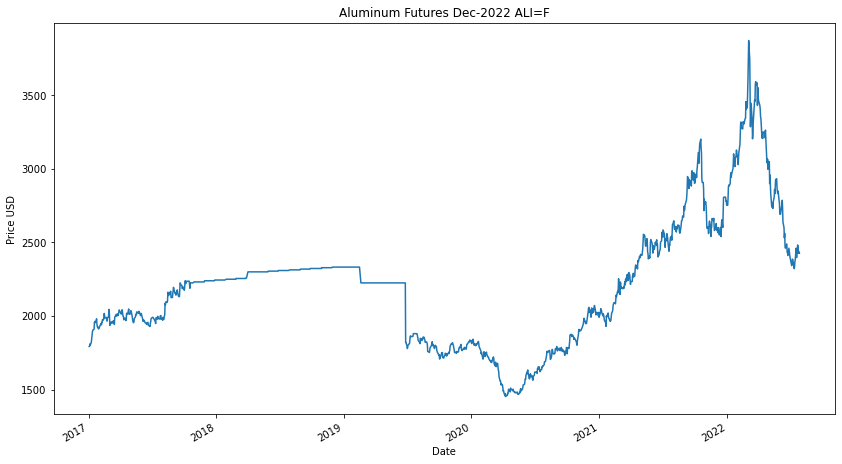

In [41]:
data.plot(figsize=(14,8))
plt.title('Aluminum Futures Dec-2022 ALI=F')
plt.ylabel('Price USD')

In [42]:
u = log_returns.mean()
u

0.00021722824333216572

In [43]:
var = log_returns.var()
var

0.00014635413912955988

In [44]:
stdev = log_returns.std()
stdev

0.01209769147935092

In [45]:
drift = u - (0.5 * var)
drift

0.00014405117376738578

In [46]:
np.array(drift)

array(0.00014405)

In [47]:
np.array(stdev)

array(0.01209769)

In [48]:
#set up a 96% chance of occurance
norm.ppf(0.96)

1.7506860712521692

In [49]:
x = np.random.rand(10,2)
x

array([[0.90261531, 0.95137778],
       [0.65486608, 0.90887002],
       [0.69352158, 0.93812894],
       [0.34100742, 0.25272178],
       [0.82583   , 0.31709475],
       [0.70749275, 0.96549527],
       [0.2975218 , 0.94042654],
       [0.29655603, 0.78262751],
       [0.08096778, 0.05364769],
       [0.20659395, 0.10257546]])

In [50]:
norm.ppf(x)

array([[ 1.29659845,  1.65836187],
       [ 0.39849162,  1.33382885],
       [ 0.50585729,  1.53925477],
       [-0.40971526, -0.66594922],
       [ 0.93781401, -0.47583841],
       [ 0.54607482,  1.81835777],
       [-0.53154149,  1.55836427],
       [-0.53433171,  0.78109779],
       [-1.39859137, -1.61046954],
       [-0.81829652, -1.26701221]])

In [51]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.40462431, -1.40369829],
       [-0.19027345,  0.09479119],
       [-0.22027199,  0.89624566],
       [ 0.23254521, -0.44751248],
       [-1.26419097,  2.45503061],
       [-1.00796261,  0.09922953],
       [ 1.40066083,  0.07090836],
       [ 0.68118472,  0.20736477],
       [ 1.46736942, -0.62458256],
       [ 0.0578836 , -1.18989857]])

In [52]:
t_intervals = 120
interations = 500

In [53]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, interations)))
daily_returns

array([[1.00952597, 1.00264955, 1.01770601, ..., 0.9761851 , 1.01115305,
        0.99301724],
       [1.01681024, 0.99593386, 1.00370082, ..., 1.00381512, 0.98199977,
        1.00306347],
       [1.00825223, 1.01619979, 1.01156475, ..., 0.97887038, 0.99345087,
        0.99597352],
       ...,
       [0.98532311, 1.00891179, 1.00558138, ..., 0.99663309, 0.99719962,
        0.99216925],
       [0.98099864, 1.01142526, 1.00453532, ..., 1.00778201, 1.03007323,
        1.01777805],
       [0.99366437, 0.98885545, 0.99596645, ..., 0.99094238, 1.00452455,
        0.996231  ]])

In [54]:
s_zero = data.iloc[-1]
s_zero

2427.5

In [55]:
price_list = np.zeros_like(daily_returns)

In [56]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
price_list[0] = s_zero
price_list

array([[2427.5, 2427.5, 2427.5, ..., 2427.5, 2427.5, 2427.5],
       [   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ],
       ...,
       [   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ]])

In [58]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [59]:
price_list

array([[2427.5       , 2427.5       , 2427.5       , ..., 2427.5       ,
        2427.5       , 2427.5       ],
       [2468.30685755, 2417.62943414, 2436.48373648, ..., 2436.76121157,
        2383.80443423, 2434.93658551],
       [2488.67589977, 2456.79451748, 2464.66106696, ..., 2385.27336886,
        2368.19258135, 2425.13236721],
       ...,
       [3243.28969547, 2660.69934102, 2569.58078942, ..., 2305.09912644,
        2355.03757383, 1924.61929336],
       [3181.66278547, 2691.09851574, 2581.2346644 , ..., 2323.03742746,
        2425.86115934, 1958.83526966],
       [3161.5049481 , 2661.10742948, 2570.82311704, ..., 2301.99623254,
        2436.83709333, 1951.45242729]])

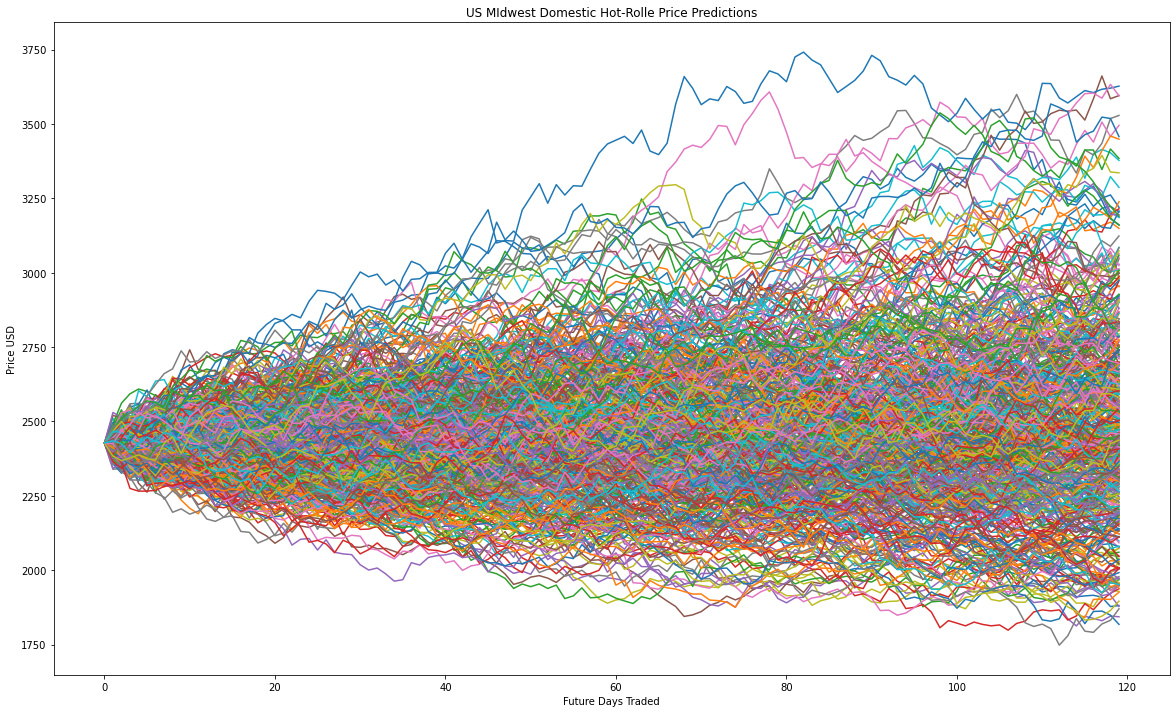

In [60]:
plt.figure(figsize=(20,12))
plt.title('Aluminum Futures Dec-2022 ALI=F Price Predictions')
plt.xlabel('Future Days Traded')
plt.ylabel('Price USD')
plt.plot(price_list)